In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, DistanceMetric

# Benjamin Granat
# USCID: 3531735770
# github = https://github.com/bengranat

# 1A

#Reading and concatinating data from column_2c.dat file.

file_path = 'column_2c.dat'
column_data = pd.read_csv(file_path, header=None, sep=' ')
column_data.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                       'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class'] 
column_data['class'] = column_data['class'].map({'NO': 0, 'AB': 1})
independent_vars = column_data.columns[:-1]
class_colors = {0: 'blue', 1: 'red'} #

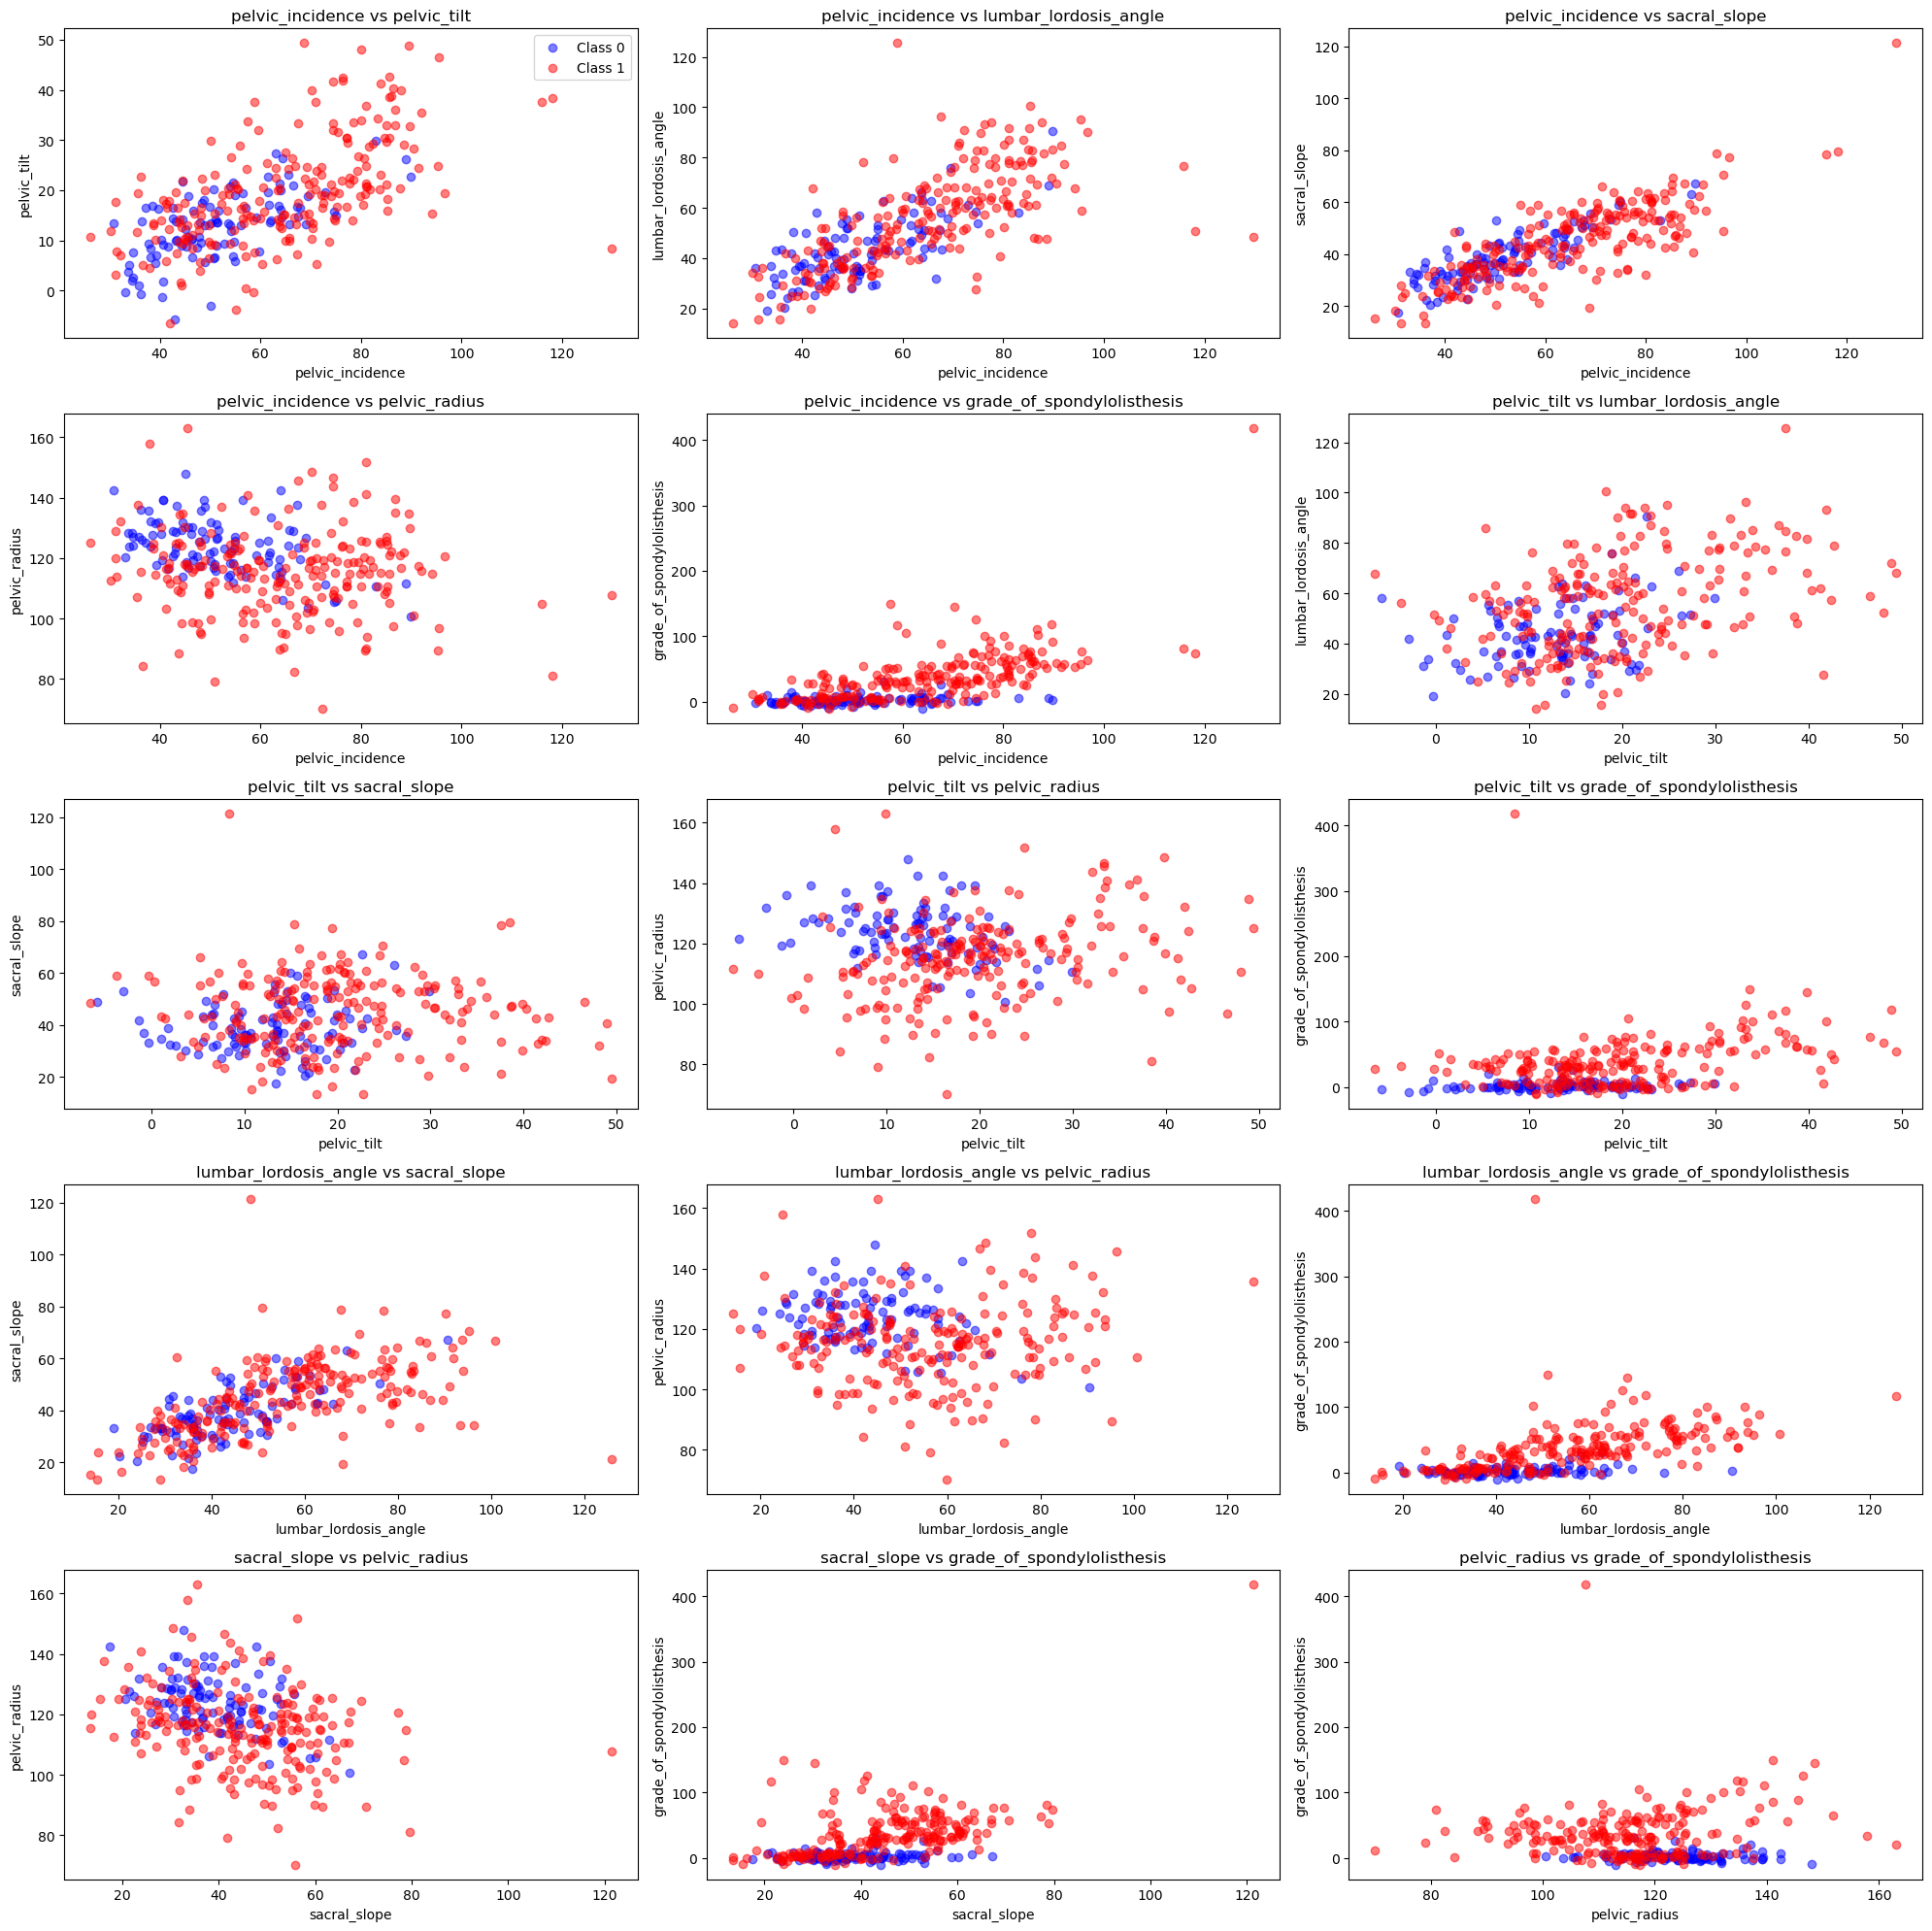

In [100]:
# 1B(i)

#Scatter plots of independent variables. I wasn't sure which independent
#variables to graph against which, so I added all of them. There are 15
#scatter plots. 
#Citations: Utilized ChatGPT and API for matplotlib plotting structure

n_vars = len(independent_vars)
n_plots = sum(range(n_vars))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) 
axes = axes.flatten()

plot_idx = 0

for i in range(n_vars):
    for j in range(i + 1, n_vars):
        ax = axes[plot_idx]
        for class_value, color in class_colors.items():
            class_data = column_data[column_data['class'] == class_value]
            ax.scatter(class_data[independent_vars[i]], class_data[independent_vars[j]], c=color, label=f'Class {class_value}', alpha=0.5)
        ax.set_title(f'{independent_vars[i]} vs {independent_vars[j]}')
        ax.set_xlabel(independent_vars[i])
        ax.set_ylabel(independent_vars[j])
        if plot_idx == 0:
            ax.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()

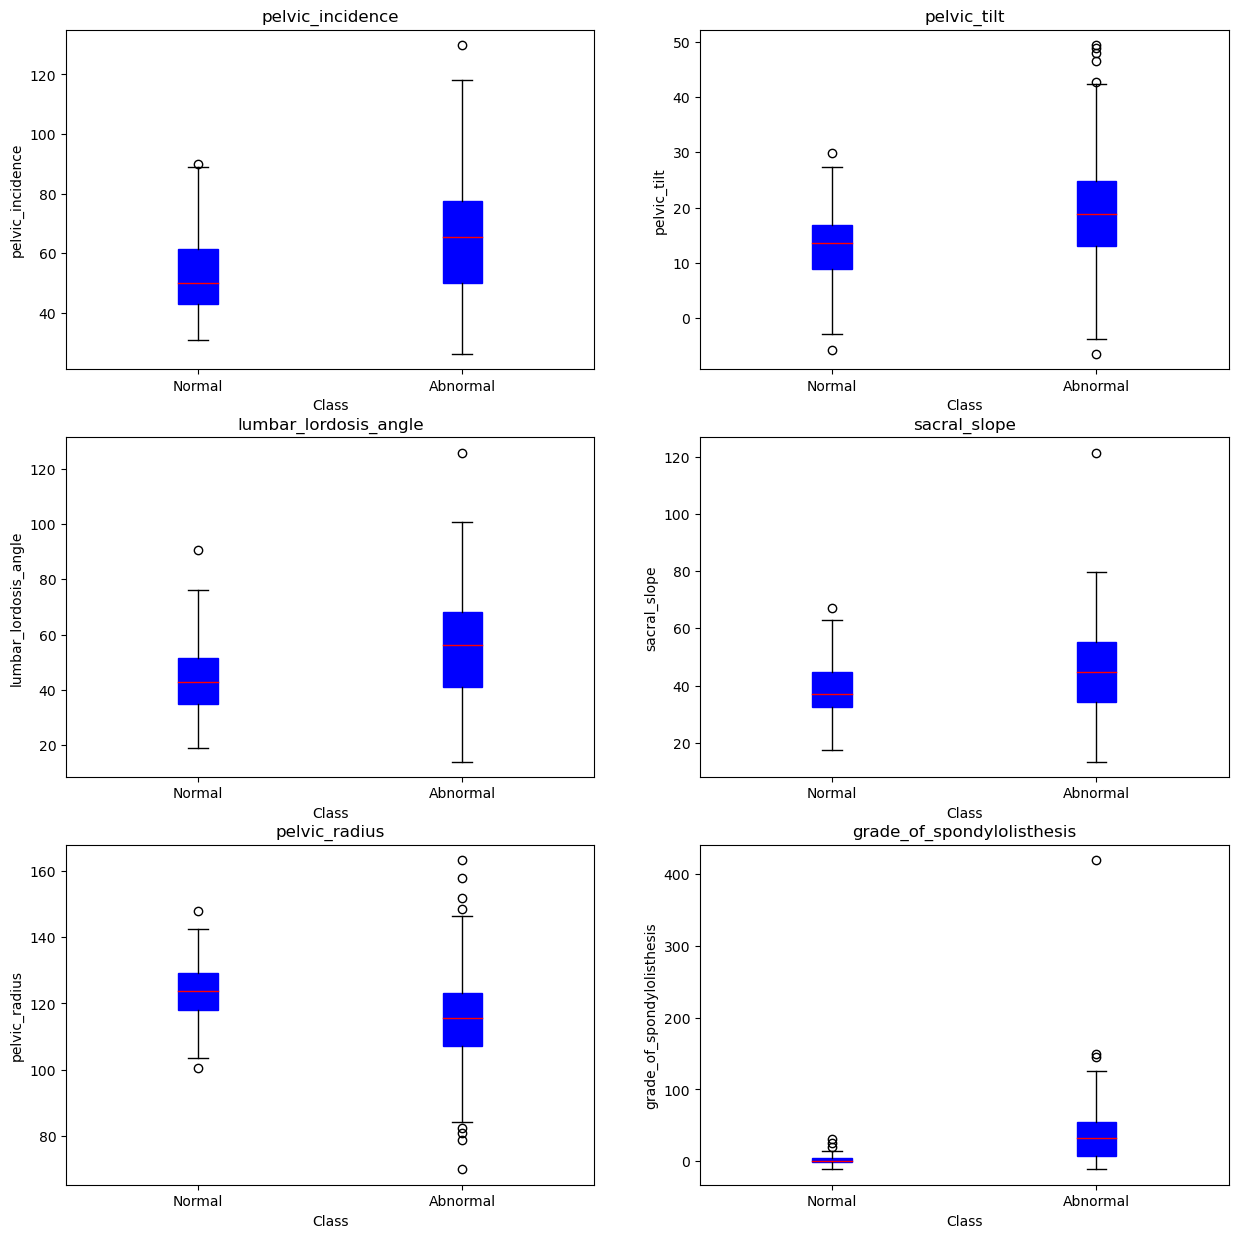

In [101]:
# 1B(ii)

#Boxplots of each independent variable
#Citations: Utilized API for matplotlib plotting structure

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
class_labels = ['Normal', 'Abnormal']
axes = axes.flatten()

for i in range(len(independent_vars)):
    ax = axes[i]
    data_0 = column_data[column_data['class'] == 0][independent_vars[i]]
    data_1 = column_data[column_data['class'] == 1][independent_vars[i]]
    ax.boxplot([data_0, data_1], labels=class_labels, patch_artist=True, 
               boxprops=dict(facecolor='blue', color='blue'),
               medianprops=dict(color='red'))
    ax.set_title(independent_vars[i])
    ax.set_xlabel('Class')
    ax.set_ylabel(independent_vars[i])

In [102]:
# 1B(iii)

#Splitting dataset into training set and test set
class_0_train = column_data[column_data['class'] == 0].iloc[:70]
class_1_train = column_data[column_data['class'] == 1].iloc[:140]
train_set = pd.concat([class_0_train, class_1_train])
test_set = column_data.drop(train_set.index)

In [103]:
# 1C(i)

#Splitting (training and test) set into X and Y
#by dropping dependent variable. 
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

#Not sure about this step. Without standardization, I would get a 
#page full of error messages:

#/Users/bgranat/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:486: 
#UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names

#To fix, I used standardization.
#Citations: Utilized ChatGPT for error message de-bugging

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 5 
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



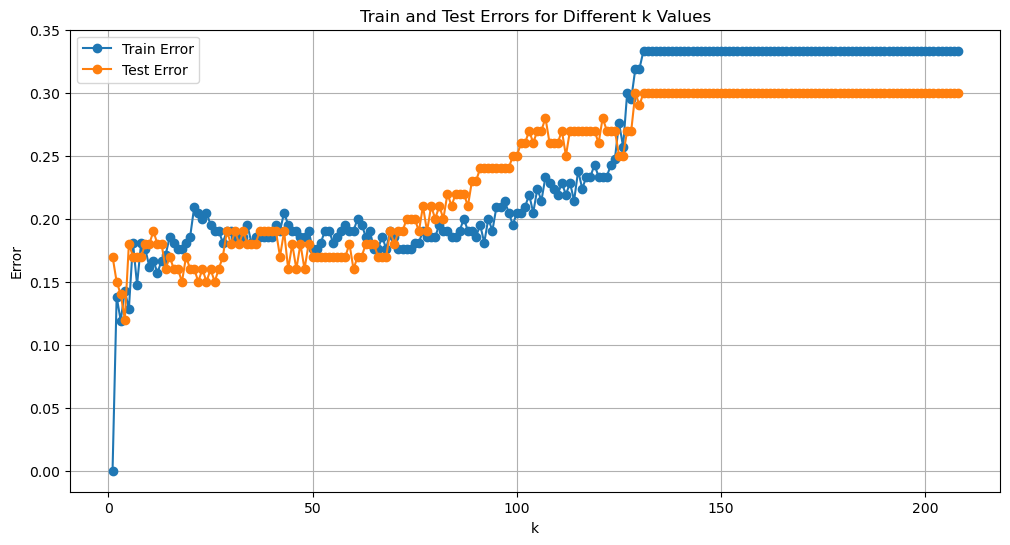

In [104]:
# 1C(ii) pt.1

k_values = list(range(208, 0, -1))
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    # Training error 
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    # Test error
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)
    
#Storing minimal training errors for Question 1F
min_train_errors = []
min_train_errors.append(np.argmin(train_errors))

#Citations: Utilized ChatGPT for matplotlib plotting structure    
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# 1C(ii) pt.2

#Best k
k_star = k_values[np.argmin(test_errors)]
print(f"The best k is: {k_star}")

#Best knn
knn_star = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')
knn_star.fit(X_train, y_train)
y_test_pred_star = knn_star.predict(X_test)

#Confusion matrix, true positive rate, true negative rate, precision
#and F1 score
#Citations: https://stackoverflow.com/questions/31324218/scikit-learn
#-how-to-obtain-true-positive-true-negative-false-positive-and-fal
conf_matrix = confusion_matrix(y_test, y_test_pred_star)
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_test_pred_star)
f1 = f1_score(y_test, y_test_pred_star)

# Display the results
# Citations: Utilized ChatGPT for print statement syntax structure
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nTrue Positive Rate (Recall): {tpr:.2f}")
print(f"True Negative Rate (Specificity): {tnr:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred_star):.2f}")

The best k is: 4
Confusion Matrix:
[[22  8]
 [ 4 66]]

True Positive Rate (Recall): 0.94
True Negative Rate (Specificity): 0.73
Precision: 0.89
F1-score: 0.92
Accuracy Score: 0.88


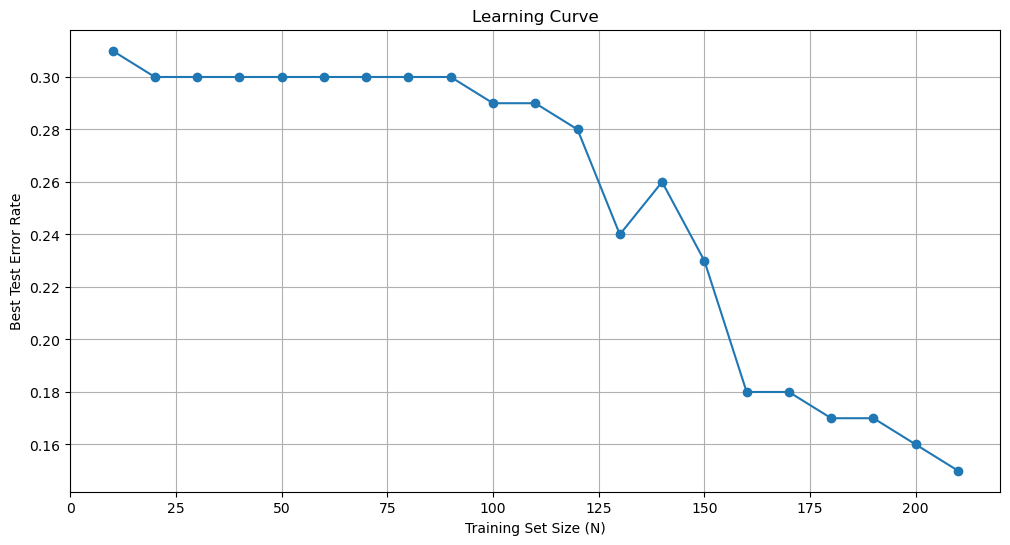

In [106]:
# 1C(iii)

training_sizes = list(range(10, 211, 10))
best_test_errors = []

#Looping through each training size
#Utilized ChatGPT for error-debugging
for N in training_sizes:
    #Select the N/3 rows of Class 0
    #Select the first N - N/3 rows of Class 1
    num_class_0 = N // 3
    num_class_1 = N - num_class_0
    #Training subset
    class_0_subset = class_0_train.iloc[:num_class_0]
    class_1_subset = class_1_train.iloc[:num_class_1]
    train_subset = pd.concat([class_0_subset, class_1_subset])
    #Splitting training set into X and Y 
    X_train_subset = train_subset.drop('class', axis=1)
    y_train_subset = train_subset['class']
    #Standardizing training set
    scaler = StandardScaler()
    X_train_subset = scaler.fit_transform(X_train_subset)
    k_values = list(range(1, N, 5))
    test_errors = []
    train_errors = []
    #Calculating test errors and storing them for plotting
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_subset, y_train_subset)
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
        y_train_pred = knn.predict(X_train_subset)
        train_error = 1 - accuracy_score(y_train_subset, y_train_pred)
        train_errors.append(train_error)
    #Best test error
    best_test_error = min(test_errors)
    best_test_errors.append(best_test_error)
    #Storing minimal training errors for Question 1F
    min_train_errors.append(np.argmin(train_errors))

#Plot of learning curve
#Citations: Utilized ChatGPT for maplotlib plotting structure
plt.figure(figsize=(12, 6))
plt.plot(training_sizes, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

In [108]:
# 1D(i)

#To avoid repetion, I defined a function which calculates best_k:
#Citations: Utilized ChatGPT for function structure and error debugging
def find_best_k(metric, **kwargs):
    test_errors = []
    train_errors = [] 
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, **kwargs)
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
        y_train_pred = knn.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
    best_k_index = np.argmin(test_errors)
    best_k = k_values[best_k_index]
    best_test_error = test_errors[best_k_index]
    return best_k, best_test_error

k_values = list(range(1, 197, 5))

#Manhattan Distance w/ p = 1
best_k_manhattan, best_test_error_manhattan = find_best_k('minkowski', p=1)

#Minkowski Distance w/ log(p) ∈ {0.1,0.2,...,1}
#Citations: Utilized ChatGPT and internet for Minkowski distance
#and structure of for loop
log_p_values = np.arange(0.1, 1.1, 0.1)
best_log_p = None
best_test_error_log_p = float('inf')
for log_p in log_p_values:
    p = 10 ** log_p
    _, test_error = find_best_k('minkowski', p=p)
    if test_error < best_test_error_log_p:
        best_log_p = log_p
        best_test_error_log_p = test_error

#Chebyshev Distance       
best_k_chebyshev, best_test_error_chebyshev = find_best_k('chebyshev')

#Mahalanobis Distance
cov_matrix = np.cov(X_train, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_metric = DistanceMetric.get_metric('mahalanobis', VI=inv_cov_matrix)
best_k_mahalanobis, best_test_error_mahalanobis = find_best_k(mahalanobis_metric)

#Printing of all best test errors and best k's
#Citations: Utilized ChatGPT for efficient printing structure
results = pd.DataFrame({
    'Metric': ['Manhattan', 'Minkowski', 'Chebyshev', 'Mahalanobis'],
    'Best k': [best_k_manhattan, best_k_manhattan, best_k_chebyshev, best_k_mahalanobis],
    'Best Test Error': [best_test_error_manhattan, best_test_error_log_p, best_test_error_chebyshev, best_test_error_mahalanobis]
})

print(results)

        Metric  Best k  Best Test Error
0    Manhattan       6             0.14
1    Minkowski       6             0.15
2    Chebyshev       1             0.15
3  Mahalanobis       1             0.17


In [ ]:
# 1E

#Similar function to previous cell, involving weighting
#Citations: Utilized ChatGPT for function structure and 
#error debugging
def find_best_test_error_weighting(metric, **kwargs):
    test_errors = []
    train_errors = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance', **kwargs)
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
        y_train_pred = knn.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
    min_train_errors.append(np.argmin(train_errors))
    best_test_error = min(test_errors)
    return best_test_error

#Euclidean Distance
best_test_error_euclidean = find_best_test_error_weighting('euclidean')

#Manhattan Distance
best_test_error_manhattan = find_best_test_error_weighting('manhattan')

#Chebyshev Distance
best_test_error_chebyshev = find_best_test_error_weighting('chebyshev')

#Printing of all best test errors
#Citations: Utilized ChatGPT for efficient printing structure
results = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Chebyshev'],
    'Best Test Error': [best_test_error_euclidean, best_test_error_manhattan, best_test_error_chebyshev]
})

print(results)

In [ ]:
# 1F

#Utilizing each of the stored minimal training error rates, I calculated the minimal
#training error rate for the entire homework. 
print(min_training_errors)
print(np.argmin(min_training_errors))
print("The lowest training error rate achieved in this homework is 0.")